In [1]:
import structuralcodes as sc
import matplotlib.pyplot as plt
import numpy as np

# Materials


In [2]:
a = np.abs(-1.3)
type(a)

numpy.float64

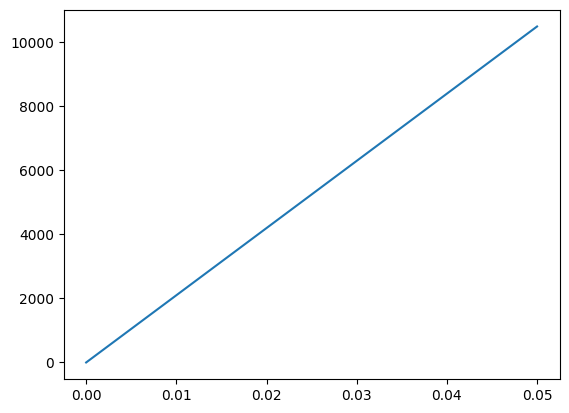

In [3]:
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

In [4]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(E = 210000)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)

29.8 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

The slowest run took 4.35 times longer than the fastest. This could mean that an intermediate result is being cached.
527 µs ± 403 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%timeit
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

2.16 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


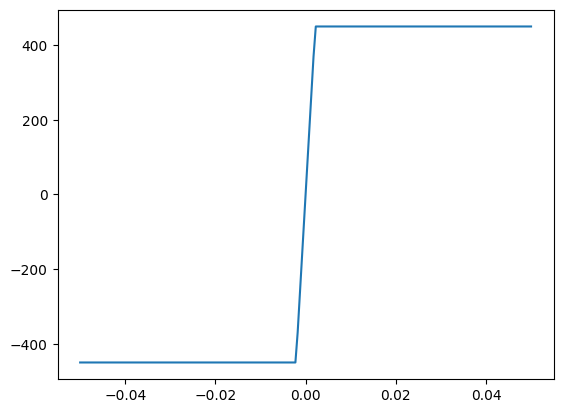

In [7]:
el_reinf = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.0675)
strain = np.linspace(-0.05,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el_reinf.get_stress(strain[i])

plt.plot(strain,stress)


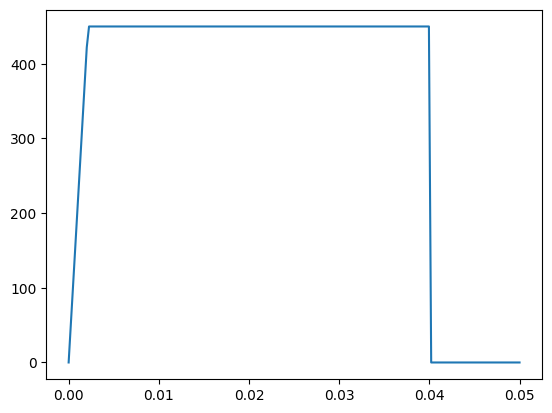

In [8]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450,eps_su = 0.04)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

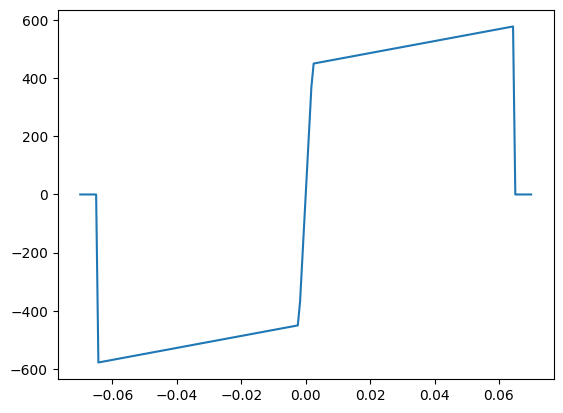

In [9]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.065, Eh = 2060)
strain = np.linspace(-0.07,0.07,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

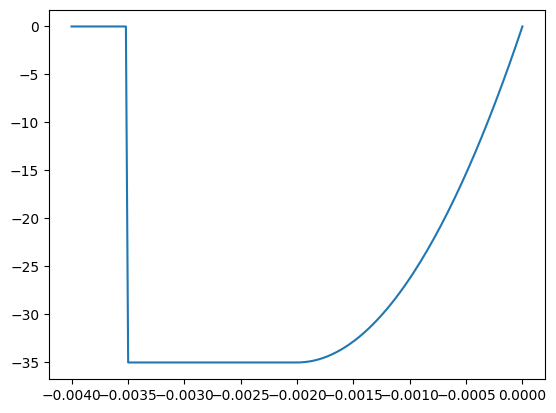

In [10]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

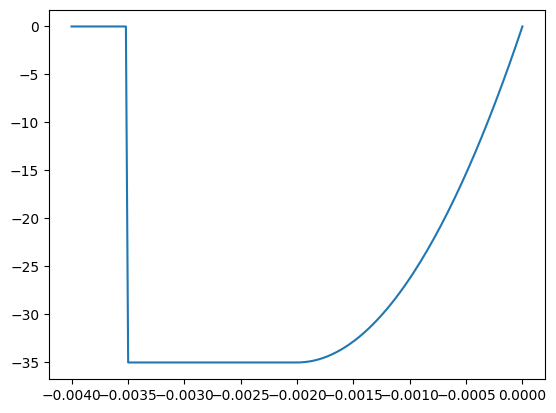

In [11]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
plt.plot(strain,el.get_stress(strain))

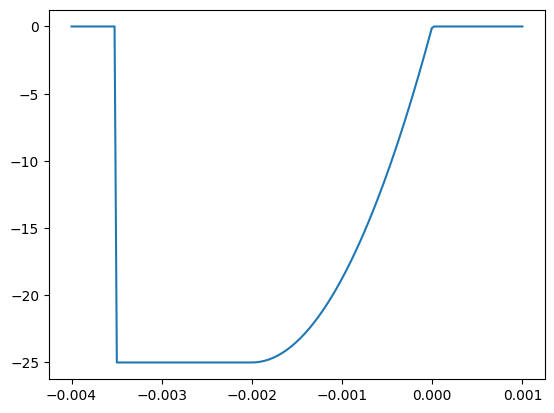

In [12]:
sc.set_design_code('mc2010')
C25 = sc.materials.concrete.create_concrete(25,'C25')

strain = np.linspace(0.001,-0.004,200)

plt.plot(strain,C25.stress_strain.get_stress(strain))


# Section

Example of creation of a PointGeometry (should not be needed in general since we will provide apposite methods for adding reinforcement)

In [13]:
from shapely import Point
import structuralcodes.sections._generic as gs

# Create two points with default naming (uses global counter)
for i in range(2):
    p = gs.PointGeometry(np.array([2,3]),12,C25)
    print(f'"{p.name}"',p.x,p.y,p.diameter,p.area,p.material)
# Create two points with custom naming
for i in range(2):
    p = gs.PointGeometry(np.array([2,3]),12,C25,name='my_group')
    print(f'"{p.name}"',p.x,p.y,p.diameter,p.area,p.material)

"Geometry_0" 2.0 3.0 12 113.09733552923255 <structuralcodes.materials.concrete._concreteMC2010.ConcreteMC2010 object at 0x000001A8AB5C8508>
"Geometry_1" 2.0 3.0 12 113.09733552923255 <structuralcodes.materials.concrete._concreteMC2010.ConcreteMC2010 object at 0x000001A8AB5C8508>
"my_group" 2.0 3.0 12 113.09733552923255 <structuralcodes.materials.concrete._concreteMC2010.ConcreteMC2010 object at 0x000001A8AB5C8508>
"my_group" 2.0 3.0 12 113.09733552923255 <structuralcodes.materials.concrete._concreteMC2010.ConcreteMC2010 object at 0x000001A8AB5C8508>


Utility function for plotting with matplotlib a polygon

In [14]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


# Plots a Polygon to pyplot `ax`
def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)

    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

Example of creation of a polygon (with holes)

Above line
	 LINEARRING (-100 66.60254037844385, -50 37.735026918962554, -50 50, 50 50, 50 -19.999999999999993, 100 -48.86751345948128, 100 100, -100 100, -100 66.60254037844385)
	Interiors:
		 LINEARRING (-30 70, -30 90, 30 90, 30 70, -30 70)  cw?  True
Below line
	 LINEARRING (100 -48.86751345948128, 50 -19.999999999999993, 50 -50, -50 -50, -50 37.735026918962554, -100 66.60254037844385, -100 -100, 100 -100, 100 -48.86751345948128)
	Interiors:


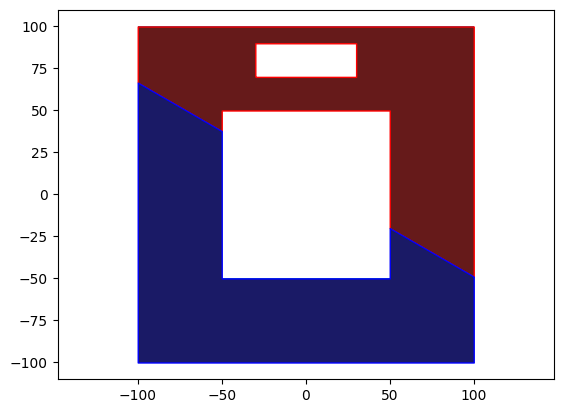

In [15]:
from shapely import Polygon

#create a shapely polygon
poly = Polygon(shell=[(-100,-100),(100,-100),(100,100),(-100,100)],holes=[[(-50,-50),(-50,50),(50,50),(50,-50)],[(-30,70),(-30,90),(30,90),(30,70)]])

# create a surfacegeometry object
geom = gs.SurfaceGeometry(poly,C25)

fig,ax = plt.subplots()
plot_polygon(ax, geom.polygon)
ax.axis('equal')

ab,bl = geom.split(line=((50,-20),5*np.pi/6))

print('Above line')
# We can also be sure, if we need, to have the correct orientation: shell CCW, holes CW
from shapely.geometry.polygon import orient
for a in ab:
    # print(list(a.exterior.coords))
    print('\t',a.exterior if a.exterior.is_ccw else orient(a,1).exterior)
    print('\tInteriors:')
    for i in orient(a,1).interiors:
        print('\t\t',i, ' cw? ', not(i.is_ccw))
    plot_polygon(ax,a,facecolor=(0.4,0.1,0.1), edgecolor='r')
print('Below line')
for b in bl:
    print('\t',b.exterior if b.exterior.is_ccw else orient(b,1).exterior)
    print('\tInteriors:')
    for i in orient(b,1).interiors:
        print('\t\t',i)
    plot_polygon(ax,b,facecolor=(0.1,0.1,0.4), edgecolor='b')

Split can be called providing LineString object directly

True
GEOMETRYCOLLECTION (POLYGON ((100 19.166666666666668, 100 -100, -100 -100, -100 10.833333333333332, -50 12.916666666666666, -50 -50, 50 -50, 50 17.083333333333332, 100 19.166666666666668)), POLYGON ((-100 10.833333333333332, -100 100, 100 100, 100 19.166666666666668, 50 17.083333333333332, 50 50, -50 50, -50 12.916666666666666, -100 10.833333333333332), (-30 70, 30 70, 30 90, -30 90, -30 70)))
(-120.0, 10.0) (120.0, 20.0)


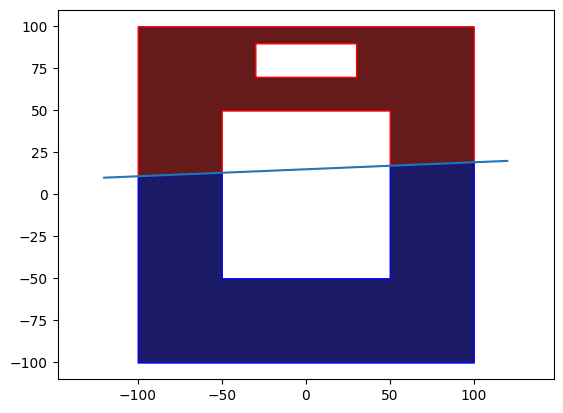

In [16]:
from shapely import LineString
from shapely.ops import split

#create a shapely polygon
poly = Polygon(shell=[(-100,-100),(100,-100),(100,100),(-100,100)],holes=[[(-50,-50),(-50,50),(50,50),(50,-50)],[(-30,70),(-30,90),(30,90),(30,70)]])
# create a surfacegeometry object
geom = gs.SurfaceGeometry(poly,C25)

fig,ax = plt.subplots()
plot_polygon(ax, geom.polygon)
ax.axis('equal')

# Providing LineString is dangerous because line could not intersect
# properly the polygon, try with this line: LineString([(-80,10),(120,20)])
line = LineString([(-120,10),(120,20)])
ab,bl = geom.split(line)
print(line.intersects(geom.polygon))
print(split(geom.polygon,line))
ax.plot(*line.xy)
print(line.coords[0],line.coords[1])
for a in ab:
    plot_polygon(ax,a,facecolor=(0.4,0.1,0.1), edgecolor='r')
for b in bl:
    plot_polygon(ax,b,facecolor=(0.1,0.1,0.4), edgecolor='b')

Getting polygon part within two lines:

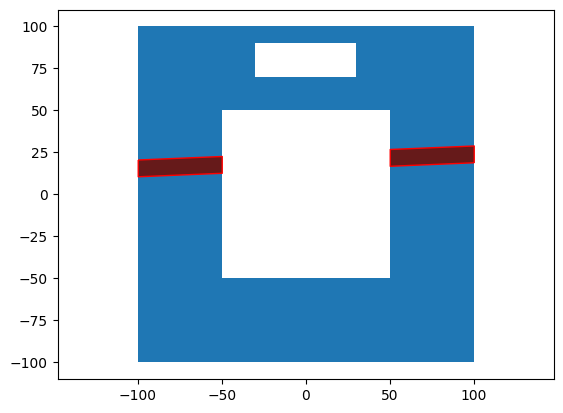

In [17]:
from shapely import MultiLineString

#create a shapely polygon
poly = Polygon(shell=[(-100,-100),(100,-100),(100,100),(-100,100)],holes=[[(-50,-50),(-50,50),(50,50),(50,-50)],[(-30,70),(-30,90),(30,90),(30,70)]])
# create a surfacegeometry object
geom = gs.SurfaceGeometry(poly,C25)

fig,ax = plt.subplots()
plot_polygon(ax, geom.polygon)
ax.axis('equal')

# Providing LineString is dangerous because line could not intersect
# properly the polygon, try with this line: LineString([(-80,10),(120,20)])
line1 = LineString([(-120,10),(120,20)])
line2 = LineString([(-120,20),(120,30)])
lines = MultiLineString((line1, line2))
result = geom.split_two_lines(lines)
for poly in result.geoms:
    plot_polygon(ax,poly,facecolor=(0.4,0.1,0.1), edgecolor='r')

Or alternatively:

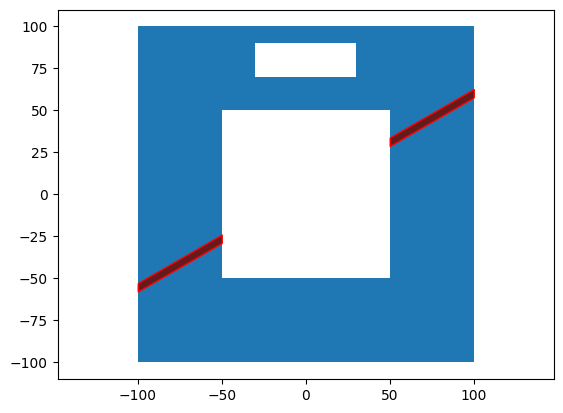

In [23]:
#create a shapely polygon
poly = Polygon(shell=[(-100,-100),(100,-100),(100,100),(-100,100)],holes=[[(-50,-50),(-50,50),(50,50),(50,-50)],[(-30,70),(-30,90),(30,90),(30,70)]])
# create a surfacegeometry object
geom = gs.SurfaceGeometry(poly,C25)

fig,ax = plt.subplots()
plot_polygon(ax, geom.polygon)
ax.axis('equal')

line1 = gs.create_line_point_angle((0,0), np.pi/6, poly.bounds)
line2 = gs.create_line_point_angle((0,5), np.pi/6, poly.bounds)

result = geom.split_two_lines((line1, line2))
for poly in result.geoms:
    plot_polygon(ax,poly,facecolor=(0.4,0.1,0.1), edgecolor='r')
